<div align=center>

<p></p>
<p></p>
 <br/>
    <br/>
<font size=5 color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font size=5 color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Spring 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 4 - KNN
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  May the 31st


<br/>
<br/>
<b>
<font size=5>
Kian Izadpanah - 400104783
</font>
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [3]:
# TODO
df = pd.read_csv("/kaggle/input/train-dataset/train.csv")

print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        

Calculate the number of samples

In [4]:
# TODO
print(f"Num of samples: {df.shape[0]}")

Num of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [5]:
# TODO
unique_counts = df.nunique()
for column, count in unique_counts.items():
    print(f'Column "{column}" has {count} unique values')

Column "Age" has 43 unique values
Column "Attrition" has 2 unique values
Column "BusinessTravel" has 3 unique values
Column "DailyRate" has 736 unique values
Column "Department" has 3 unique values
Column "DistanceFromHome" has 29 unique values
Column "Education" has 5 unique values
Column "EducationField" has 6 unique values
Column "EmployeeCount" has 1 unique values
Column "EmployeeNumber" has 1102 unique values
Column "EnvironmentSatisfaction" has 4 unique values
Column "Gender" has 2 unique values
Column "HourlyRate" has 71 unique values
Column "JobInvolvement" has 4 unique values
Column "JobLevel" has 5 unique values
Column "JobRole" has 9 unique values
Column "JobSatisfaction" has 4 unique values
Column "MaritalStatus" has 3 unique values
Column "MonthlyIncome" has 1027 unique values
Column "MonthlyRate" has 1082 unique values
Column "NumCompaniesWorked" has 10 unique values
Column "Over18" has 1 unique values
Column "OverTime" has 2 unique values
Column "PercentSalaryHike" has 1

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [6]:
# TODO
idx = []
for column, count in unique_counts.items():
    if count < 2:
        idx.append(column)
        
cleaned_df = df.drop(columns=idx)

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [7]:
# handle uniqueness
# TODO
df_encoded = pd.get_dummies(cleaned_df, columns=['BusinessTravel'])
for col in df_encoded.columns:
    if col.startswith('BusinessTravel_'):
        df_encoded[col] = df_encoded[col].astype(int)

In [8]:
# Map the column
# TODO
numeric_columns = df_encoded.select_dtypes(include=['number']).columns
mean_business_travel_by_age = df_encoded.groupby('Age')[numeric_columns].mean()
business_travel_columns = [col for col in df_encoded.columns if col.startswith('BusinessTravel_')]
mean_business_travel_by_age['Mean_BusinessTravel'] = mean_business_travel_by_age[business_travel_columns].mean(axis=1)

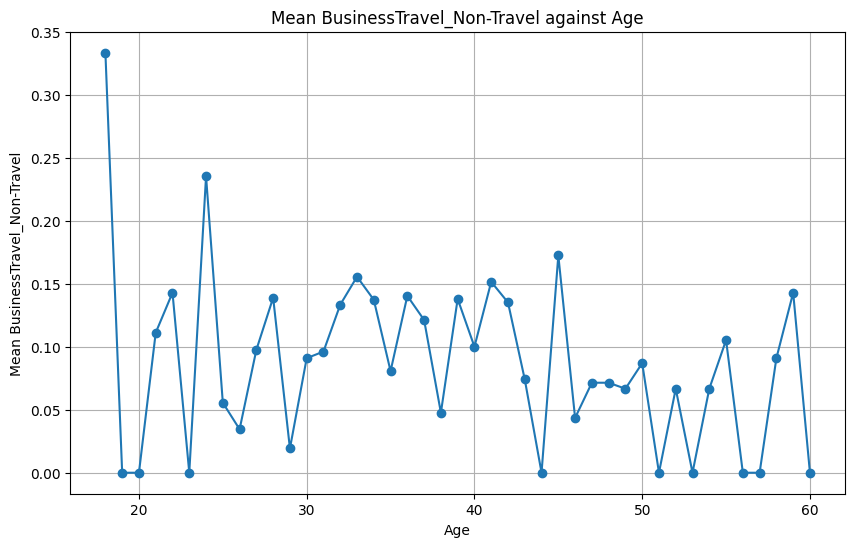

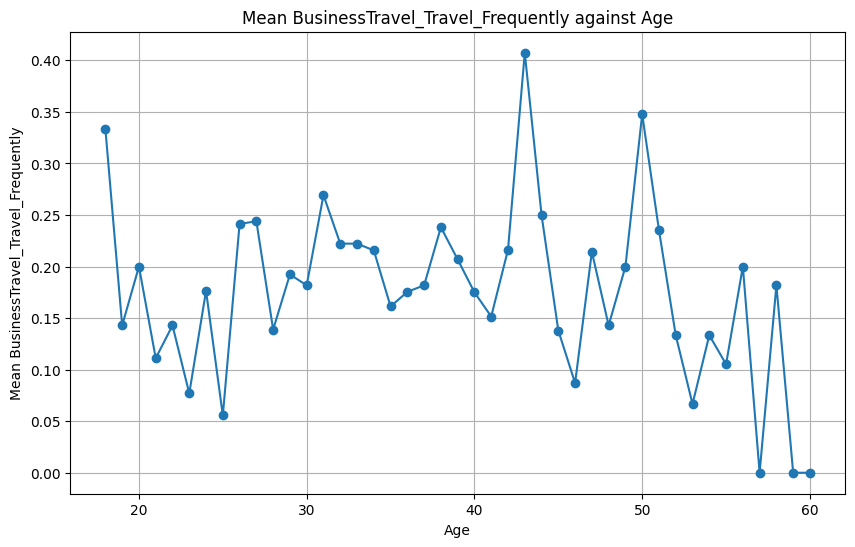

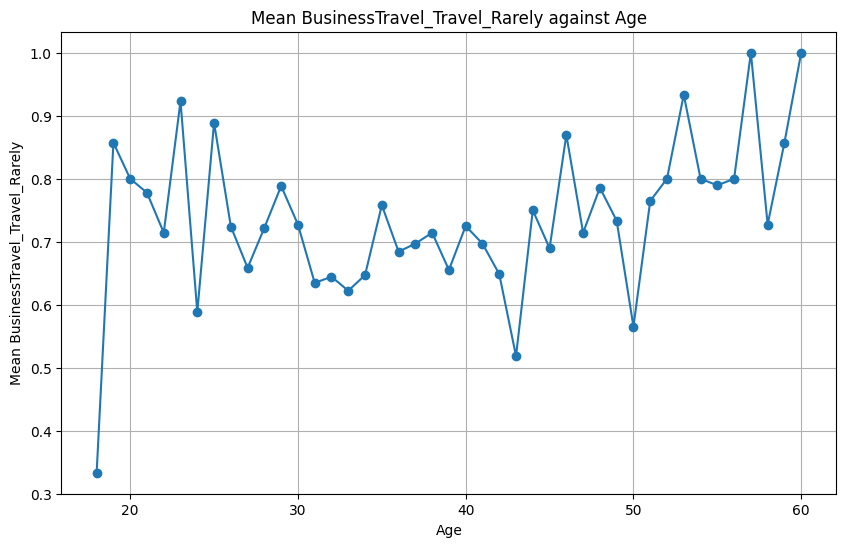

In [9]:
# plot
# TODO
for col in business_travel_columns:
    x = mean_business_travel_by_age[col].index
    y = mean_business_travel_by_age[col]
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.title(f'Mean {col} against Age')
    plt.xlabel('Age')
    plt.ylabel(f'Mean {col}')
    plt.grid(True)
    plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

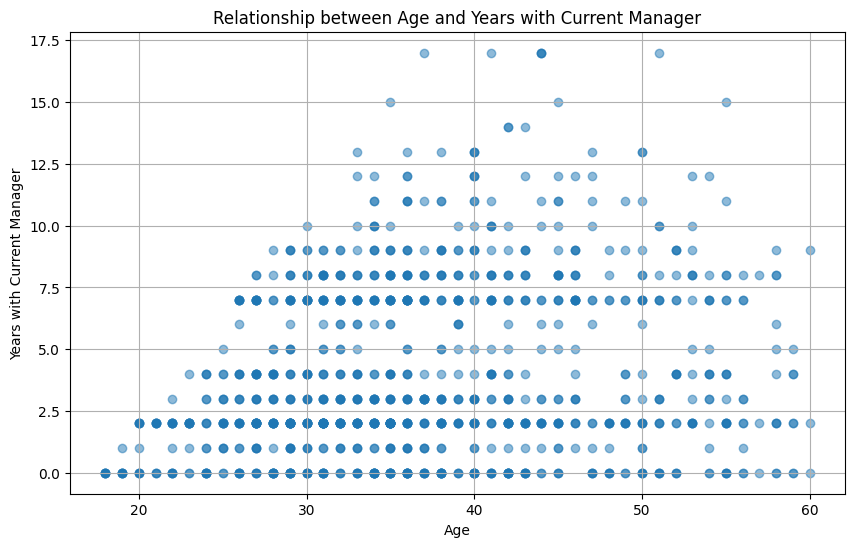

In [10]:
# TODO
mean_years_with_manager_by_age = df.groupby('Age')['YearsWithCurrManager'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['YearsWithCurrManager'], alpha=0.5)
plt.title('Relationship between Age and Years with Current Manager')
plt.xlabel('Age')
plt.ylabel('Years with Current Manager')
plt.grid(True)
plt.show()

# Analysis:
As it is demonstrated in the plot, as `Age` increases, the `Years With Current Manager` tends to increase slightly, but the relationship is not strong or very pronounced. In other words these variables have positive but small correlation. In the following cell we check their correlation.

In [12]:
correlation = df['Age'].corr(df['YearsWithCurrManager'])
print(f"The correlation between Age and Years With Current Manager is: {correlation}")

The correlation between Age and Years With Current Manager is: 0.19872949548244342


Plot the average MonthlyIncome against the YearsAtCompany. 

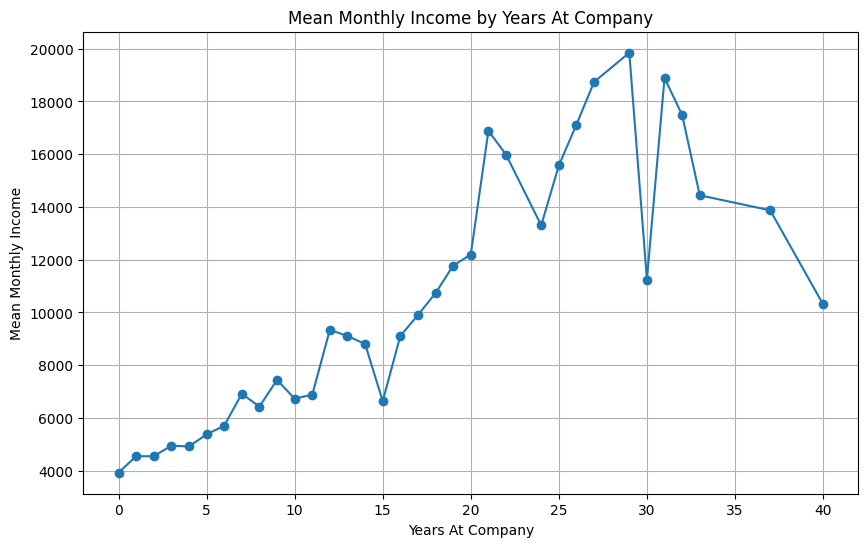

In [13]:
# TODO
monthly_income_by_years_at_company = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_income_by_years_at_company.index, monthly_income_by_years_at_company, marker='o')
plt.title('Mean Monthly Income by Years At Company')
plt.xlabel('Years At Company')
plt.ylabel('Mean Monthly Income')
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [14]:
# Label encode
# TODO
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in non_numerical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    
X = df.drop(columns=["Attrition"]).values
y = df["Attrition"].values

In [15]:
# split into train and validation
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [16]:
# lens of train and validation datasets
# TODO
print(f"length of train set is {X_train.shape[0]}")
print(f"length of val set is {X_val.shape[0]}")
print(f"length of test set is {X_test.shape[0]}")

length of train set is 660
length of val set is 221
length of test set is 221



# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [17]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k
        
    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        return np.sqrt(np.sum((x1 - x2)**2))
        
    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_t) for x_t in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest = [self.y_train[k] for k in k_indices]

        most_common = Counter(k_nearest).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [18]:
# TODO
model = KNN()
model.fit(X_train, y_train)

Predict the y_train and y_test values.

In [19]:
# TODO
y_hat_train = model.predict(X_train)
train_acc = np.sum(y_hat_train == y_train) / len(y_train)
print(f"Train_Accuracy: {train_acc}")

y_hat_test = model.predict(X_test)
test_acc = np.sum(y_hat_test == y_test) / len(y_test)
print(f"Test_Accuracy: {test_acc}")

Train_Accuracy: 0.8727272727272727
Test_Accuracy: 0.755656108597285


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [20]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [21]:
# TODO
y_hat_test = knn.predict(X_test)
test_acc = np.sum(y_hat_test == y_test) / len(y_test)
print(f"Accuracy: {test_acc}")

Accuracy: 0.755656108597285


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**